In [103]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydf = pd.read_csv(city_data_to_load)
ridedf= pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
mergeddf= pd.merge(ridedf, citydf, on="city", how="left")
mergeddf.dropna

# Display the data table for preview
mergeddf.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

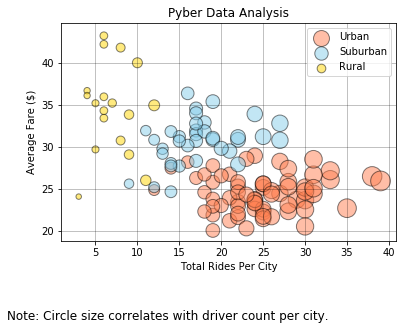

In [104]:
# Separate DataFrame by City Type
urban_data= mergeddf.loc[(mergeddf["type"] == "Urban")]
suburban_data = mergeddf.loc[(mergeddf["type"] == "Suburban")]
rural_data = mergeddf.loc[(mergeddf["type"] == "Rural")]


# Calculate Fare Average by City Type
urban_fare_average = urban_data.groupby(['city'])['fare'].mean()
suburban_fare_average= suburban_data.groupby(['city'])['fare'].mean()
rural_fare_average= rural_data.groupby(['city'])['fare'].mean()

# Count Total Rides by City Type
urban_rides_total = urban_data.groupby(['city'])['ride_id'].count()
suburban_rides_total=suburban_data.groupby(['city'])['ride_id'].count()
rural_rides_total = rural_data.groupby(['city'])['ride_id'].count()

# Build the scatter plots for each city types
plt.scatter(urban_rides_total, urban_fare_average,s=urban_drivers_total*10,
            marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(suburban_rides_total, suburban_fare_average,s=suburban_drivers_total*10,
            marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(rural_rides_total, rural_fare_average,s=rural_drivers_total*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.5, label="Rural")

# Incorporate the other graph properties
plt.xlabel("Total Rides Per City")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Data Analysis")
plt.grid(color='black',alpha=.3)

# Create a legend
plt.legend(loc="upper right")

# Incorporate a text label regarding circle size
textstr= "Note: Circle size correlates with driver count per city."
plt.gcf().text(0,-.15,textstr, fontsize=12)

# Save Figure
plt.savefig("Images/PyberDataAnalysis.png")

# Show Plot
plt.show()

## Total Fares by City Type

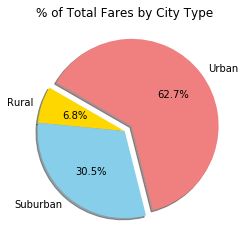

In [105]:
# Calculate Type Percents
total_by_type = mergeddf.groupby(['type'])['fare'].sum()

# Build Pie Chart
plt.pie(total_by_type, labels = ["Rural","Suburban","Urban"], explode=(0, 0, 0.1),colors = ["gold","skyblue","lightcoral"],autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/ % of Total Fares by City Type")

# Show Figure
plt.show()

Text(0.5, 1.0, '% of Total Rides by City Type')

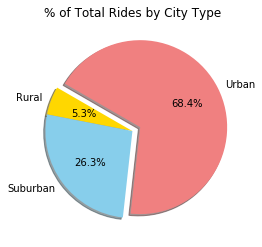

In [76]:
rides_total = mergeddf.groupby(['type'])['ride_id'].count()
plt.pie(rides_total,labels = ["Rural","Suburban","Urban"],explode=(0,0,0.1), colors = ["gold","skyblue","lightcoral"],autopct="%1.1f%%", shadow=True,startangle=150)
plt.title("% of Total Rides by City Type")

Text(0.5, 1.0, '% of Total Drivers by City Type')

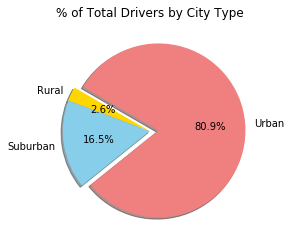

In [83]:
unique_city_df= citydf.drop_duplicates('city')
total_drivers = unique_city_df.groupby(['type'])['driver_count'].sum()
plt.pie(total_drivers,labels = ["Rural","Suburban","Urban"],explode=(0,0,0.1), colors = ["gold","skyblue","lightcoral"],autopct="%1.1f%%", shadow=True,startangle=150)
plt.title("% of Total Drivers by City Type")

## Total Rides by City Type

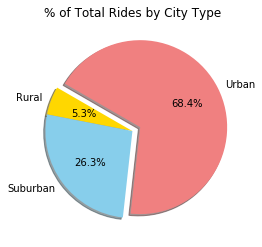

In [107]:
# Calculate Ride Percents
rides_total = mergeddf.groupby(['type'])['ride_id'].count()

# Build Pie Chart
plt.pie(rides_total,labels = ["Rural","Suburban","Urban"],explode=(0,0,0.1), colors = ["gold","skyblue","lightcoral"],autopct="%1.1f%%", shadow=True,startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/% of Total Rides by City Type")

# Show Figure
plt.show()

## Total Drivers by City Type

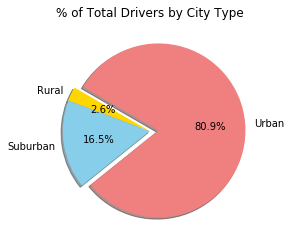

In [108]:
# Calculate Driver Percents
unique_city_df= citydf.drop_duplicates('city')
total_drivers = unique_city_df.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
plt.pie(total_drivers,labels = ["Rural","Suburban","Urban"],explode=(0,0,0.1), colors = ["gold","skyblue","lightcoral"],autopct="%1.1f%%", shadow=True,startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("% of Total Drivers by City Type")

# Show Figure
plt.show()

In [ ]:
# Data Trends
# Urban cities are dominating the ride share markets in  with suburban and rural respectively following behind 
# There is currently a surplus of drivers in urban areas relative to demand while there is a scarcity of drivers in suburban and rural areas relative to demand
# Fares are generally higher in suburban and rural areas, perhaps implying the length of rides is longer or demand outweighs driver availability